<a href="https://colab.research.google.com/github/Hamzazia761/Boston-House-Model./blob/main/4_Quarter_2_(DL)_Boston_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets) , (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets.shape

(404,)

In [6]:
test_targets.shape

(102,)

In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_targets[0]

15.2

In [9]:
# Normalizing the data to format values between 0 and 1
mean = train_data.mean(axis=0) # column wise
train_data -= mean

std = train_data.std(axis=0)
train_data / std

test_data -= mean
test_data / std

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [10]:
from keras import models
from keras import layers

In [11]:
# model defination

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [12]:
# K-fold validation

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []


for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()

  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)

  all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 180.8679 - mae: 9.4469
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 67.1220 - mae: 5.8698
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 59.3584 - mae: 5.7306
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 53.6174 - mae: 5.4298
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 51.9378 - mae: 5.3574
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 44.0246 - mae: 4.8551
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 46.6569 - mae: 5.0224
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 41.0176 - mae: 4.7624
Epoch 9/100
303/303 [==============================] - 0s 1ms/step - loss: 38.2838 - mae: 4.5095
Epoch 10/100
303/303 [==============================] - 0s 2ms/step - loss: 36.2437 - mae: 4.5197
Epoch 11

In [13]:
all_scores

[2.1539318561553955, 2.7867307662963867, 2.9822475910186768, 2.667309522628784]

In [14]:
np.mean(all_scores)

2.647554934024811

In [16]:
num_epochs = 80
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)

partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

model = build_model()
history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
# Building the history of successive mean K-fold validation scores

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

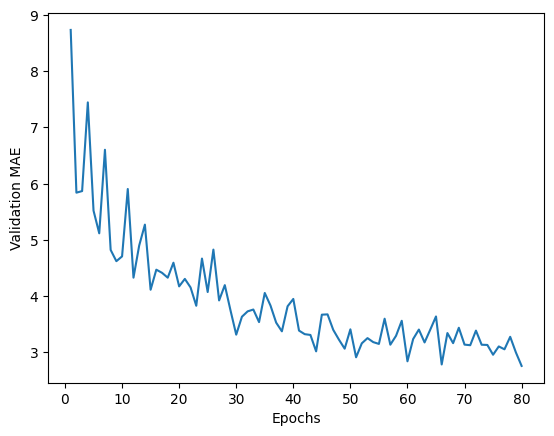

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

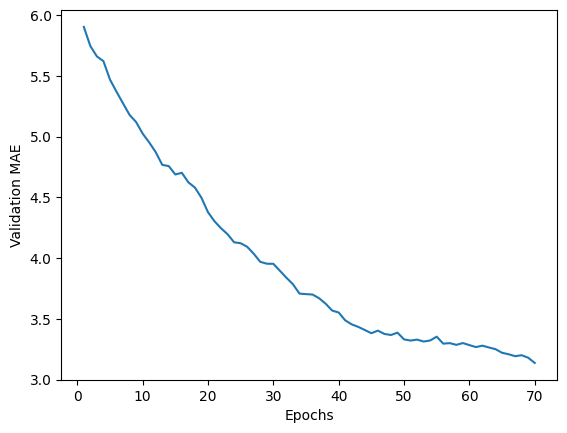

In [19]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])


plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [22]:
# training final model
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
26/26 [==============================] - 1s 1ms/step - loss: 172.6110 - mae: 8.8796
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 78.7265 - mae: 6.4007
Epoch 3/80
26/26 [==============================] - 0s 1ms/step - loss: 66.1845 - mae: 5.7851
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 61.5219 - mae: 5.5610
Epoch 5/80
26/26 [==============================] - 0s 1ms/step - loss: 50.3386 - mae: 5.0360
Epoch 6/80
26/26 [==============================] - 0s 1ms/step - loss: 43.2486 - mae: 4.8706
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 41.6652 - mae: 4.5764
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 40.8037 - mae: 4.6386
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 39.9528 - mae: 4.6506
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 35.0100 - mae: 4.3512
Epoch 11/80
26/26 [==============================] - 0s 1m

In [24]:
test_mae_score

4.046799182891846